In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from utility.get_twitter import *
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss, make_scorer
from utility.text_normalizer import *
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
import copy

In [2]:
pd.set_option("display.max_colwidth", None)

In [3]:
data = pd.read_csv('../data/all_queries.csv')
data.head()

,date,time,tweet,tweet_id,hashtags,user_id,username,location,num_followers,geo_enabled,long,lat,relevant,neg_sent_score,neu_sent_score,pos_sent_score,compound_sent_score,sent_class
0,11/8/21,17:11:01,"Defender Radio Live: Canid Response Teams and Coexistence Lesley Sampson of Coyote Watch Canada joins Defender Radio Podcast host Michael Howie for a live event and recording in Hamilton, Ontario. https://t.co/jLycjr3Xv7",1.460000e+18,[],9.202440e+08,CoyoteWatchCAN,"Ontario, CA",4420,True,NaN,NaN,0.0,0.000,0.912,0.088,0.2023,positive
1,11/8/21,14:25:52,Yaw 💃💃. Good Morning Twitter Family 🤩✨,1.460000e+18,[],1.460000e+18,coyote_kissa1,"Pasadena, CA",57,False,NaN,NaN,0.0,0.000,0.634,0.366,0.6369,positive
2,11/8/21,12:27:50,"At this moment, I have a neighbor that lives 750 away. He keeps his two Labrador retrievers in a 15’ish square pen with a roof outside at night. How do I know this? Because I came hear them barking. Constantly. \n\nApparently they just won a debate with the coyotes. https://t.co/oJV5Swuc3f",1.460000e+18,[],1.330000e+18,DavidCMaybury,"Perris, CA",438,True,NaN,NaN,1.0,0.000,0.930,0.070,0.5719,positive
3,11/8/21,10:51:07,"@AstroBackyard Had the coyotes barking within a few hundred feet of me in Joshua Tree tonight. I shined a light in their direction to let them know I’m aware of them. Oddly, one sounded like a dog.\n\nWhat freaked me out more were the hikers somewhere in the dark. I just heard foot steps!",1.460000e+18,[],6.883438e+07,darrenreely,"Los Angeles, CA",147,True,NaN,NaN,1.0,0.039,0.912,0.049,0.1511,positive
4,11/8/21,8:28:38,"really just saw a coyote cross the street and stare at me as i drove by 😭😭😭 what the, la habra heights",1.460000e+18,[],2.323440e+09,angeIiques,she/her,109,True,NaN,NaN,1.0,0.256,0.744,0.000,-0.8519,negative


In [4]:
df = data[['tweet', 'relevant']]
df.head()

,tweet,relevant
0,"Defender Radio Live: Canid Response Teams and Coexistence Lesley Sampson of Coyote Watch Canada joins Defender Radio Podcast host Michael Howie for a live event and recording in Hamilton, Ontario. https://t.co/jLycjr3Xv7",0.0
1,Yaw 💃💃. Good Morning Twitter Family 🤩✨,0.0
2,"At this moment, I have a neighbor that lives 750 away. He keeps his two Labrador retrievers in a 15’ish square pen with a roof outside at night. How do I know this? Because I came hear them barking. Constantly. \n\nApparently they just won a debate with the coyotes. https://t.co/oJV5Swuc3f",1.0
3,"@AstroBackyard Had the coyotes barking within a few hundred feet of me in Joshua Tree tonight. I shined a light in their direction to let them know I’m aware of them. Oddly, one sounded like a dog.\n\nWhat freaked me out more were the hikers somewhere in the dark. I just heard foot steps!",1.0
4,"really just saw a coyote cross the street and stare at me as i drove by 😭😭😭 what the, la habra heights",1.0


In [5]:
model = joblib.load('../bayes_model/best_bayes_pipeline.pkl')

/Users/Isaacbolo/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/Isaacbolo/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/Isaacbolo/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator Pipeline from version 0.24.1 when using version 1.0.2. This might 

In [6]:
model.best_params_

{'bayes__alpha': 1,
 'wordcount__lowercase': True,
 'wordcount__min_df': 2,
 'wordcount__ngram_range': (1, 2),
 'wordcount__preprocessor': <function utility.text_normalizer.tweet_preprocessor(tweet: str) -> str>,
 'wordcount__stop_words': 'english',
 'wordcount__strip_accents': 'ascii'}

In [11]:
predic_proba = model.predict_proba(df['tweet'])

/Users/Isaacbolo/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make'] not in stop_words.
  warnings.warn(


In [12]:
df['proba_0'] = predic_proba[:,0]
df['proba_1'] = predic_proba[:,1]

/var/folders/50/cgfcx8d97_52qyt5jj7jf52w0000gn/T/ipykernel_92734/3948545355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['proba_0'] = predic_proba[:,0]
/var/folders/50/cgfcx8d97_52qyt5jj7jf52w0000gn/T/ipykernel_92734/3948545355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['proba_1'] = predic_proba[:,1]


In [13]:
df.head()

,tweet,relevant,proba_0,proba_1
0,"Defender Radio Live: Canid Response Teams and Coexistence Lesley Sampson of Coyote Watch Canada joins Defender Radio Podcast host Michael Howie for a live event and recording in Hamilton, Ontario. https://t.co/jLycjr3Xv7",0.0,0.887770,0.112230
1,Yaw 💃💃. Good Morning Twitter Family 🤩✨,0.0,0.641706,0.358294
2,"At this moment, I have a neighbor that lives 750 away. He keeps his two Labrador retrievers in a 15’ish square pen with a roof outside at night. How do I know this? Because I came hear them barking. Constantly. \n\nApparently they just won a debate with the coyotes. https://t.co/oJV5Swuc3f",1.0,0.035002,0.964998
3,"@AstroBackyard Had the coyotes barking within a few hundred feet of me in Joshua Tree tonight. I shined a light in their direction to let them know I’m aware of them. Oddly, one sounded like a dog.\n\nWhat freaked me out more were the hikers somewhere in the dark. I just heard foot steps!",1.0,0.547319,0.452681
4,"really just saw a coyote cross the street and stare at me as i drove by 😭😭😭 what the, la habra heights",1.0,0.047740,0.952260


In [14]:
df_train = df[(df['proba_0'] > 0.85) | (df['proba_1'] > 0.85)]
df_train.shape

(1802, 4)

In [15]:
df_train

,tweet,relevant,proba_0,proba_1
0,"Defender Radio Live: Canid Response Teams and Coexistence Lesley Sampson of Coyote Watch Canada joins Defender Radio Podcast host Michael Howie for a live event and recording in Hamilton, Ontario. https://t.co/jLycjr3Xv7",0.0,0.887770,0.112230
2,"At this moment, I have a neighbor that lives 750 away. He keeps his two Labrador retrievers in a 15’ish square pen with a roof outside at night. How do I know this? Because I came hear them barking. Constantly. \n\nApparently they just won a debate with the coyotes. https://t.co/oJV5Swuc3f",1.0,0.035002,0.964998
4,"really just saw a coyote cross the street and stare at me as i drove by 😭😭😭 what the, la habra heights",1.0,0.047740,0.952260
7,To make it worse no one else saw the coyote bruh,1.0,0.949047,0.050953
8,"my enemy the big coyote ran in front of my car tonight, but i couldn’t end him like that. if i ever catch him it’ll be on though",1.0,0.023555,0.976445
...,...,...,...,...
3594,FUCK !! I just hit a coyote,1.0,0.141424,0.858576
3595,I can't stop imagining this help. The Hounds of Bakersfield nah bro that's a rabid methed up daytime coyote in a litter den downtown,0.0,0.888760,0.111240
3596,"@jwrife I can’t have chickens. Too many predators: raccoons, foxes, coyotes and bobcats. Too bad cuz I love fresh eggs 🥚🍳",0.0,0.853605,0.146395
3599,Potential locations for the antics of Wild E. Coyote and Roadrunner based on USGS habitat data https://t.co/PT0STjgrqi https://t.co/mpW9JOJBXa https://t.co/dqorVmDk8Q,0.0,0.951907,0.048093


In [20]:
# df_train.to_csv('../data/training_data_01.csv', index=None, encoding='utf-8-sig')

In [7]:
df_train = pd.read_csv('../data/training_data_01.csv')
df_train.head()

,tweet,relevant,proba_0,proba_1
0,"Defender Radio Live: Canid Response Teams and Coexistence Lesley Sampson of Coyote Watch Canada joins Defender Radio Podcast host Michael Howie for a live event and recording in Hamilton, Ontario. https://t.co/jLycjr3Xv7",0.0,0.887770,0.112230
1,"At this moment, I have a neighbor that lives 750 away. He keeps his two Labrador retrievers in a 15’ish square pen with a roof outside at night. How do I know this? Because I came hear them barking. Constantly. \n\nApparently they just won a debate with the coyotes. https://t.co/oJV5Swuc3f",1.0,0.035002,0.964998
2,"really just saw a coyote cross the street and stare at me as i drove by 😭😭😭 what the, la habra heights",1.0,0.047740,0.952260
3,To make it worse no one else saw the coyote bruh,1.0,0.949047,0.050953
4,"my enemy the big coyote ran in front of my car tonight, but i couldn’t end him like that. if i ever catch him it’ll be on though",1.0,0.023555,0.976445


Check data to see if classifications are good

In [8]:
df_train[df_train['proba_1'] > 0.85].sort_values(['proba_1'], ascending=True)

,tweet,relevant,proba_0,proba_1
685,Heinous and cruel experience for any dog and all wildlife caught in these devices.\n'A living nightmare': Bellevue man urges caution after dog caught in coyote trap https://t.co/vkJAls1LNo via @IdahoMtExpress,1.0,1.479857e-01,0.852014
921,not so rare coyote sighting (4th one we’ve seen this morning) https://t.co/3b7LAub5PB,1.0,1.454051e-01,0.854595
1158,@ehuston101 @enkohl @EyaSpectre my very short lens coyote encounter this morning on #carfree section of JFK #goldengatepark,1.0,1.454051e-01,0.854595
411,Coyotes creeping through the fog this morning https://t.co/R2j12XTnMS,1.0,1.454051e-01,0.854595
1151,@sfmjm I was there this morning and saw a coyote too.,1.0,1.454051e-01,0.854595
...,...,...,...,...
91,San Diego Humane Society caring for coyote rescued from car bumper in San Marcos https://t.co/l1rE381UNZ,1.0,3.320027e-06,0.999997
135,"2 am I let the dogs out. \n👇🏽escapes. Hubby &amp; I spend the wee morning hours driving, walking, screaming, shaking treats on the canyon where we live. Owl almost hit my car. Coyotes ran by. As I weep imagining Francis being food, he appears next to my car. Wanting treats. 😑 https://t.co/uJgxPOlTxh",1.0,1.248066e-07,1.000000
61,@Southernvaper1 This is what I mean by playing with Eli. He never actually bit me. No pain. Just blood and stains on my shirts. But Eli has killed a coyote with a single bite to the neck. He is a badass dog. I love playing with him. It always ends with Eli on his back &amp; me rubbing his belly. https://t.co/ID8YPw2qGF,1.0,9.081170e-08,1.000000
106,"A Phoenix couple caught their cat chasing away a coyote from their home early in the morning and it was all captured on their security camera. ""Lucky, spunky cat."" https://t.co/8bnfBWc677",1.0,4.184189e-11,1.000000


In [9]:
df_train[df_train['proba_0'] > 0.85].sort_values(['proba_0'], ascending=True)

,tweet,relevant,proba_0,proba_1
995,@savg_coyote @Schmidt0810 @BoltUpHerbert @MaxxxMunich @chargers We can only hope honestly.,0.0,0.851327,1.486729e-01
1311,@Grimmy_Coyote His stuff is great.,0.0,0.851327,1.486729e-01
638,@JonPalarz @Coyotes_Hoops @Gavin_Murphy10 Congratulations on a great accomplishment Coach!,0.0,0.851327,1.486729e-01
1684,@coyote_witch You'll have to show photos of your intestines,0.0,0.851327,1.486729e-01
843,@Nameless_Coyote Nonsense! Your art is lovely!,0.0,0.851327,1.486729e-01
...,...,...,...,...
1503,"On January 30, 2020, Alex Iafallo recorded his first career hat trick in a 3-2 win for the @LAKings over the Arizona Coyotes. Iafallo tied the game late in the third period, then won the game 24 seconds into overtime.\n\n#LAKings #GoKingsGo https://t.co/kA2MlVbOpZ",0.0,0.999995,5.473302e-06
92,The Fall Fun Run Continues this Wed at the Coyote Bar and Grill in Downtown Carlsbad. Come see So Cal's all star jam band live! https://t.co/ajwumPjTcp,0.0,0.999996,4.182585e-06
167,Predictions for today:\nKings &gt; Blues \nLightning &gt; Sabres \nCapitals &gt; Senators\nPanthers &gt; Coyotes \nRangers &gt; Flames\nHurricanes &gt; Maple Leafs\nBlue Jackets &gt; Stars \n\nSeason Record: 36-46,0.0,0.999996,4.003349e-06
177,"@ogiegoldthorpe @DomRichard1988 @alfred_jens @ldl716 Well he's signing with the Arizona Coyotes July 1, 2024 so they better trade him sooner. #Yotes already shedding contracts &amp; tanking to stock the future with some very high draft picks to lure him. Matthews is going to save hockey in the desert &amp; lead them to a Cup, not the Leafs",0.0,0.999997,3.205254e-06


In [10]:
X = df_train['tweet']
y = df_train['relevant']

# Split data

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=None)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1256,), (539,), (1256,), (539,))

In [48]:
# Percent of y == 1
y_train[y_train==1].sum() / len(y_train), y_test[y_test==1].sum() / len(y_test)

(0.2085987261146497, 0.17625231910946196)

About the same distribution of 1's for both training and test

In [13]:
# Save training and test sets
train = pd.DataFrame({'X':X_train, 'y':y_train})
test = pd.DataFrame({'X': X_test, 'y': y_test})

NameError: name 'X_train' is not defined

In [115]:
# train.to_csv('../data/retrain_training.csv', index=None)
# test.to_csv('../data/retrain_test.csv', index=None)

In [14]:
train = pd.read_csv('../data/retrain_training.csv')
test = pd.read_csv('../data/retrain_test.csv')
X_train = train['X']
y_train = train['y']
X_test = test['X']
y_test = test['y']

# Metric Support Function

In [15]:
def print_scores(model, y_true, X_val):
    y_hat = model.predict_proba(X_val)[:,1]
    y_pred = model.predict(X_val)
    print(classification_report(y_true, y_pred, target_names=['irrelevant', 'relevant']))
    print(f'Log Loss: {log_loss(y_true, y_hat):.5f}')
    sns.heatmap(confusion_matrix(y_true, y_pred).T, square=True, annot=True, fmt='d')

In [16]:
def get_log_loss(model, y_true, X):
    y_hat = model.predict_proba(X)[:,1]
    return np.round(log_loss(y_true, y_hat), 4)

# Hyperparameter search

# CV and NB

In [17]:
models = []

In [19]:
cv = CountVectorizer(preprocessor=tweet_preprocessor, strip_accents='ascii')
nb = MultinomialNB()
pipeline = Pipeline([('cv', cv), ('nb', nb)])
params = {
    'cv__lowercase': [True, False],
    'cv__min_df': [0,1,2],
    'cv__ngram_range': [(1,1), (1,2)],
    'cv__stop_words': ['english', None],
    'nb__alpha': [1, 5, 7, 10, 20]
}
search = RandomizedSearchCV(pipeline, param_distributions=params, scoring='neg_log_loss', cv=3, verbose=50, n_jobs=-1, n_iter=15)

In [20]:
%%time
search.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


/Users/Isaacbolo/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make'] not in stop_words.
  warnings.warn(
/Users/Isaacbolo/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make'] not in stop_words.
  warnings.warn(
/Users/Isaacbolo/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make'] not in stop_words.
  warnings.warn(
/Users/Isaacbolo/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop wor

CPU times: user 10.9 s, sys: 331 ms, total: 11.2 s
Wall time: 2min 18s


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('cv',
                                              CountVectorizer(preprocessor=<function tweet_preprocessor at 0x7f7fe1cbc790>,
                                                              strip_accents='ascii')),
                                             ('nb', MultinomialNB())]),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'cv__lowercase': [True, False],
                                        'cv__min_df': [0, 1, 2],
                                        'cv__ngram_range': [(1, 1), (1, 2)],
                                        'cv__stop_words': ['english', None],
                                        'nb__alpha': [1, 5, 7, 10, 20]},
                   scoring='neg_log_loss', verbose=50)

In [21]:
search.best_params_

{'nb__alpha': 5,
 'cv__stop_words': 'english',
 'cv__ngram_range': (1, 1),
 'cv__min_df': 2,
 'cv__lowercase': False}

In [22]:
cvnb = search.best_estimator_
models.append(cvnb)

# CV SVM

In [23]:
svc = SVC(probability=True, class_weight='balanced')
pipeline = Pipeline([('cv', cv), ('svc', svc)])
params = {
    'cv__lowercase': [True, False],
    'cv__min_df': [0,1,2],
    'cv__ngram_range': [(1,1), (1,2)],
    'cv__stop_words': ['english', None],
    'svc__kernel': ['sigmoid', 'linear', 'rbf']
}
search = RandomizedSearchCV(pipeline, param_distributions=params, verbose=50, scoring='neg_log_loss', n_jobs=-1, cv=3, n_iter=15)

In [24]:
search.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


/Users/Isaacbolo/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make'] not in stop_words.
  warnings.warn(
/Users/Isaacbolo/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make'] not in stop_words.
  warnings.warn(
/Users/Isaacbolo/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make'] not in stop_words.
  warnings.warn(
/Users/Isaacbolo/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop wor

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('cv',
                                              CountVectorizer(preprocessor=<function tweet_preprocessor at 0x7f7fe1cbc790>,
                                                              strip_accents='ascii')),
                                             ('svc',
                                              SVC(class_weight='balanced',
                                                  probability=True))]),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'cv__lowercase': [True, False],
                                        'cv__min_df': [0, 1, 2],
                                        'cv__ngram_range': [(1, 1), (1, 2)],
                                        'cv__stop_words': ['english', None],
                                        'svc__kernel': ['sigmoid', 'linear',
                                                        'rbf']},
                   scoring='neg_log_lo

In [25]:
search.best_params_

{'svc__kernel': 'sigmoid',
 'cv__stop_words': 'english',
 'cv__ngram_range': (1, 2),
 'cv__min_df': 0,
 'cv__lowercase': True}

In [26]:
cvsvc = search.best_estimator_

In [27]:
models.append(cvsvc)

# TFIDF and NB

In [28]:
tfidf = TfidfVectorizer(smooth_idf=True, strip_accents='ascii', preprocessor=tweet_preprocessor)
nb = MultinomialNB()
pipeline = Pipeline([('tfidf', tfidf), ('nb', nb)])
params = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__lowercase': [True, False],
    'tfidf__max_df': [0,1,2,3],
    'tfidf__min_df': [0,1,2,3],
    'tfidf__stop_words': ['english', None],
    'nb__alpha': np.linspace(.5, 5, 4)
}
search = RandomizedSearchCV(pipeline, param_distributions=params, cv=3, verbose=50, n_jobs=-1, scoring='neg_log_loss', n_iter=15)

In [29]:
search.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


/Users/Isaacbolo/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make'] not in stop_words.
  warnings.warn(
/Users/Isaacbolo/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make'] not in stop_words.
  warnings.warn(
/Users/Isaacbolo/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make'] not in stop_words.
  warnings.warn(
/Users/Isaacbolo/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop wor

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('tfidf',
                                              TfidfVectorizer(preprocessor=<function tweet_preprocessor at 0x7f7fe1cbc790>,
                                                              strip_accents='ascii')),
                                             ('nb', MultinomialNB())]),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'nb__alpha': array([0.5, 2. , 3.5, 5. ]),
                                        'tfidf__lowercase': [True, False],
                                        'tfidf__max_df': [0, 1, 2, 3],
                                        'tfidf__min_df': [0, 1, 2, 3],
                                        'tfidf__ngram_range': [(1, 1), (1, 2)],
                                        'tfidf__stop_words': ['english', None]},
                   scoring='neg_log_loss', verbose=50)

In [30]:
search.best_params_

{'tfidf__stop_words': 'english',
 'tfidf__ngram_range': (1, 2),
 'tfidf__min_df': 0,
 'tfidf__max_df': 3,
 'tfidf__lowercase': False,
 'nb__alpha': 0.5}

In [31]:
tfidfnb = search.best_estimator_

In [32]:
models.append(tfidfnb)

# TFIDF and SVM

In [33]:
pipeline = Pipeline([('tfidf', tfidf), ('svc', svc)])
params = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__lowercase': [True, False],
    'tfidf__max_df': [0,1,2,3],
    'tfidf__min_df': [0,1,2,3],
    'svc__kernel': ['sigmoid', 'linear', 'rbf']
}
search = RandomizedSearchCV(pipeline, param_distributions=params, cv=3, verbose=50, n_jobs=-1, scoring='neg_log_loss', n_iter=15)

In [34]:
search.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


/Users/Isaacbolo/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
24 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/Isaacbolo/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Isaacbolo/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/Isaacbolo/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted_transfo

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('tfidf',
                                              TfidfVectorizer(preprocessor=<function tweet_preprocessor at 0x7f7fe1cbc790>,
                                                              strip_accents='ascii')),
                                             ('svc',
                                              SVC(class_weight='balanced',
                                                  probability=True))]),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'svc__kernel': ['sigmoid', 'linear',
                                                        'rbf'],
                                        'tfidf__lowercase': [True, False],
                                        'tfidf__max_df': [0, 1, 2, 3],
                                        'tfidf__min_df': [0, 1, 2, 3],
                                        'tfidf__ngram_range': [(1, 1), (1, 2)]},
                   scoring='n

In [35]:
search.best_params_

{'tfidf__ngram_range': (1, 2),
 'tfidf__min_df': 1,
 'tfidf__max_df': 2,
 'tfidf__lowercase': False,
 'svc__kernel': 'rbf'}

In [36]:
tfidfsvc = search.best_estimator_

In [37]:
models.append(tfidfsvc)

# Model Selection using Cross Validation

In [38]:
from sklearn.model_selection import cross_val_predict, KFold

In [39]:
folds = KFold(10, shuffle=False)

In [40]:
def cv_log_loss(model, X_train, y_train, folds):
    y_hat = cross_val_predict(model, X_train, y_train, cv=folds, n_jobs=-1, method='predict_proba')
    return log_loss(y_train, y_hat[:, 1])

In [41]:
losses = []
for model in models:
    losses.append((model, cv_log_loss(model, X_train, y_train, folds)))

/Users/Isaacbolo/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make'] not in stop_words.
  warnings.warn(
/Users/Isaacbolo/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make'] not in stop_words.
  warnings.warn(
/Users/Isaacbolo/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make'] not in stop_words.
  warnings.warn(
/Users/Isaacbolo/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop wor

In [42]:
losses

[(Pipeline(steps=[('cv',
                   CountVectorizer(lowercase=False, min_df=2,
                                   preprocessor=<function tweet_preprocessor at 0x7f7fe1cbc790>,
                                   stop_words='english', strip_accents='ascii')),
                  ('nb', MultinomialNB(alpha=5))]),
  0.1546562865338145),
 (Pipeline(steps=[('cv',
                   CountVectorizer(min_df=0, ngram_range=(1, 2),
                                   preprocessor=<function tweet_preprocessor at 0x7f7fe1cbc790>,
                                   stop_words='english', strip_accents='ascii')),
                  ('svc',
                   SVC(class_weight='balanced', kernel='sigmoid',
                       probability=True))]),
  0.11655289514578152),
 (Pipeline(steps=[('tfidf',
                   TfidfVectorizer(lowercase=False, max_df=3, min_df=0,
                                   ngram_range=(1, 2),
                                   preprocessor=<function tweet_preprocess

In [43]:
print('cv -> nb log loss =', losses[0][1])
print('cv -> svc log loss =', losses[1][1])
print('tfidf -> nb log loss =', losses[2][1])
print('tfidf -> svc log loss =', losses[3][1])

cv -> nb log loss = 0.1546562865338145
cv -> svc log loss = 0.11655289514578152
tfidf -> nb log loss = 0.40450344859327086
tfidf -> svc log loss = 0.5595946194083127


### Final model is CV and SVC

In [44]:
best_model = losses[1][0]
best_model

Pipeline(steps=[('cv',
                 CountVectorizer(min_df=0, ngram_range=(1, 2),
                                 preprocessor=<function tweet_preprocessor at 0x7f7fe1cbc790>,
                                 stop_words='english', strip_accents='ascii')),
                ('svc',
                 SVC(class_weight='balanced', kernel='sigmoid',
                     probability=True))])

Test on test set

              precision    recall  f1-score   support

  irrelevant       0.98      0.98      0.98       444
    relevant       0.89      0.89      0.89        95

    accuracy                           0.96       539
   macro avg       0.94      0.94      0.94       539
weighted avg       0.96      0.96      0.96       539

Log Loss: 0.17004


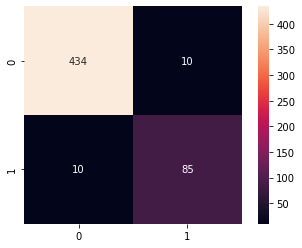

In [45]:
print_scores(best_model, y_test, X_test)

In [46]:
import joblib

In [47]:
# with open('../bayes_model/best_bayes_model_01.pkl', 'wb') as f:
#     joblib.dump(best_model, f)

In [48]:
m = joblib.load('../bayes_model/best_bayes_model_01.pkl')

In [49]:
text = ['I saw a coyote eating a dog', 'Go Coyotes!', 'When do you think well see another coyote?', 'At home yesterday I saw a coyote hiding in the bush', 'Was driving and almost ran over a coyote...', 'Swear, I heard coyotes in my backyard. My dog was barking like nuts!']

In [141]:
m.predict(text)

array([0., 0., 0., 0., 1., 1.])

# Need to check how to compare this model to the old model

In [52]:
old_model = joblib.load('../bayes_model/cvsvc_01.pkl')

/Users/Isaacbolo/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/Isaacbolo/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator SVC from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/Isaacbolo/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator Pipeline from version 0.24.1 when using version 1.0.2. This might lead to br

/Users/Isaacbolo/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

  irrelevant       0.98      0.90      0.94       444
    relevant       0.66      0.91      0.76        95

    accuracy                           0.90       539
   macro avg       0.82      0.90      0.85       539
weighted avg       0.92      0.90      0.91       539

Log Loss: 0.24175


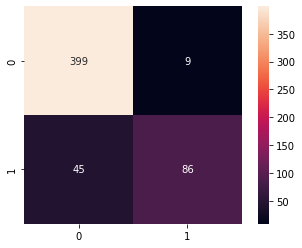

In [53]:
print_scores(old_model, y_test, X_test)

              precision    recall  f1-score   support

  irrelevant       0.98      0.98      0.98       444
    relevant       0.89      0.89      0.89        95

    accuracy                           0.96       539
   macro avg       0.94      0.94      0.94       539
weighted avg       0.96      0.96      0.96       539

Log Loss: 0.17004


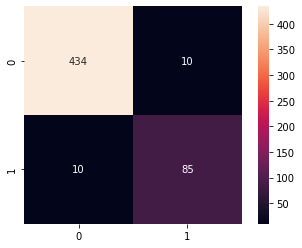

In [54]:
print_scores(best_model, y_test, X_test)

The new models performs better

## Sanity Check

In [55]:
sample = df[['tweet', 'relevant']].sample(200)
sample.shape

(200, 2)

In [56]:
new_pred = m.predict(sample['tweet'])

In [140]:
(new_pred == 1).sum()

43

In [58]:
sample['new_pred'] = new_pred

In [59]:
sample

,tweet,relevant,new_pred
1650,Ok. We have gone from lumbering not-thin monsters to speedy Wylie Coyotes!! #FullMoonFrights,0.0,0.0
3268,".@HayesTSN's Most Irrelevant Teams in Sports...👀\n\n1. Sacramento Kings😬\n\nThe rest: Buffalo Sabres, Arizona Coyotes, New Jersey Devils, Jacksonville Jaguars, Arizona Diamondbacks, Pittsburgh Pirates, Orlando Magic, Minnesota Timberwolves",0.0,0.0
2656,"In Fairfield, Ca (Solano County) and all over California and the country for that matter, wildlife is out there big time. Sightings of mountain lions, coyotes and even bears in Fairfield. Keep your pets on a leash and be alert. https://t.co/rATggRoHZt",1.0,1.0
2188,@spacey_coyote @HeaterBloc Omg YES! YES! YES!,0.0,0.0
224,Never seen a coyote wandering around this late in the morning,1.0,1.0
...,...,...,...
3570,@dbadgerNFT I said nope to the roadkill coyote scene. Maybe I will try again.,0.0,0.0
1631,@MathieuFleury Looks like a well fed coyote,0.0,0.0
2218,I just liked “https://t.co/oR5bfxTnvH | Manifesto” on #Vimeo: https://t.co/4NYz7M4cnW,0.0,0.0
2896,@savg_coyote I know you’re mad that’s why I tweeted it you reminded me lol,0.0,0.0


In [60]:
df['new_pred'] = m.predict(df['tweet'])

/var/folders/50/cgfcx8d97_52qyt5jj7jf52w0000gn/T/ipykernel_11800/2677081143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_pred'] = m.predict(df['tweet'])


In [61]:
(df['new_pred'] == 1).sum(), (df['relevant'] == 1).sum()

(708, 815)

              precision    recall  f1-score   support

  irrelevant       0.98      0.98      0.98       444
    relevant       0.89      0.89      0.89        95

    accuracy                           0.96       539
   macro avg       0.94      0.94      0.94       539
weighted avg       0.96      0.96      0.96       539

Log Loss: 0.17004


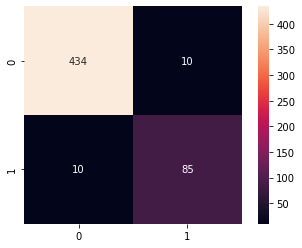

In [139]:
print_scores(m, y_test, X_test)

# Relabel all data and save it into a new dataframe

In [142]:
df = pd.read_csv('../data/all_queries.csv')
df.head()

,date,time,tweet,tweet_id,hashtags,user_id,username,location,num_followers,geo_enabled,long,lat,relevant,neg_sent_score,neu_sent_score,pos_sent_score,compound_sent_score,sent_class
0,11/8/21,17:11:01,"Defender Radio Live: Canid Response Teams and Coexistence Lesley Sampson of Coyote Watch Canada joins Defender Radio Podcast host Michael Howie for a live event and recording in Hamilton, Ontario. https://t.co/jLycjr3Xv7",1.460000e+18,[],9.202440e+08,CoyoteWatchCAN,"Ontario, CA",4420,True,NaN,NaN,0.0,0.000,0.912,0.088,0.2023,positive
1,11/8/21,14:25:52,Yaw 💃💃. Good Morning Twitter Family 🤩✨,1.460000e+18,[],1.460000e+18,coyote_kissa1,"Pasadena, CA",57,False,NaN,NaN,0.0,0.000,0.634,0.366,0.6369,positive
2,11/8/21,12:27:50,"At this moment, I have a neighbor that lives 750 away. He keeps his two Labrador retrievers in a 15’ish square pen with a roof outside at night. How do I know this? Because I came hear them barking. Constantly. \n\nApparently they just won a debate with the coyotes. https://t.co/oJV5Swuc3f",1.460000e+18,[],1.330000e+18,DavidCMaybury,"Perris, CA",438,True,NaN,NaN,1.0,0.000,0.930,0.070,0.5719,positive
3,11/8/21,10:51:07,"@AstroBackyard Had the coyotes barking within a few hundred feet of me in Joshua Tree tonight. I shined a light in their direction to let them know I’m aware of them. Oddly, one sounded like a dog.\n\nWhat freaked me out more were the hikers somewhere in the dark. I just heard foot steps!",1.460000e+18,[],6.883438e+07,darrenreely,"Los Angeles, CA",147,True,NaN,NaN,1.0,0.039,0.912,0.049,0.1511,positive
4,11/8/21,8:28:38,"really just saw a coyote cross the street and stare at me as i drove by 😭😭😭 what the, la habra heights",1.460000e+18,[],2.323440e+09,angeIiques,she/her,109,True,NaN,NaN,1.0,0.256,0.744,0.000,-0.8519,negative


In [143]:
df['relevant'] = m.predict(df['tweet'])

In [144]:
df.head()

,date,time,tweet,tweet_id,hashtags,user_id,username,location,num_followers,geo_enabled,long,lat,relevant,neg_sent_score,neu_sent_score,pos_sent_score,compound_sent_score,sent_class
0,11/8/21,17:11:01,"Defender Radio Live: Canid Response Teams and Coexistence Lesley Sampson of Coyote Watch Canada joins Defender Radio Podcast host Michael Howie for a live event and recording in Hamilton, Ontario. https://t.co/jLycjr3Xv7",1.460000e+18,[],9.202440e+08,CoyoteWatchCAN,"Ontario, CA",4420,True,NaN,NaN,0.0,0.000,0.912,0.088,0.2023,positive
1,11/8/21,14:25:52,Yaw 💃💃. Good Morning Twitter Family 🤩✨,1.460000e+18,[],1.460000e+18,coyote_kissa1,"Pasadena, CA",57,False,NaN,NaN,0.0,0.000,0.634,0.366,0.6369,positive
2,11/8/21,12:27:50,"At this moment, I have a neighbor that lives 750 away. He keeps his two Labrador retrievers in a 15’ish square pen with a roof outside at night. How do I know this? Because I came hear them barking. Constantly. \n\nApparently they just won a debate with the coyotes. https://t.co/oJV5Swuc3f",1.460000e+18,[],1.330000e+18,DavidCMaybury,"Perris, CA",438,True,NaN,NaN,1.0,0.000,0.930,0.070,0.5719,positive
3,11/8/21,10:51:07,"@AstroBackyard Had the coyotes barking within a few hundred feet of me in Joshua Tree tonight. I shined a light in their direction to let them know I’m aware of them. Oddly, one sounded like a dog.\n\nWhat freaked me out more were the hikers somewhere in the dark. I just heard foot steps!",1.460000e+18,[],6.883438e+07,darrenreely,"Los Angeles, CA",147,True,NaN,NaN,1.0,0.039,0.912,0.049,0.1511,positive
4,11/8/21,8:28:38,"really just saw a coyote cross the street and stare at me as i drove by 😭😭😭 what the, la habra heights",1.460000e+18,[],2.323440e+09,angeIiques,she/her,109,True,NaN,NaN,1.0,0.256,0.744,0.000,-0.8519,negative


In [145]:
# df.to_csv('../data/all_queries_01.csv', index=None)

In [146]:
df_old = pd.read_csv('../data/all_queries.csv')
df_new = pd.read_csv('../data/all_queries_01.csv')

In [147]:
(df_old['relevant'] == 1).sum(), (df_new['relevant'] == 1).sum()

(924, 817)

In [148]:
df_new['location'] = 'all'

# Plot

In [63]:
from sklearn.decomposition import PCA

In [66]:
print(dir(best_model))

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_is_fitted__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_can_inverse_transform', '_can_transform', '_check_feature_names', '_check_fit_params', '_check_n_features', '_estimator_type', '_final_estimator', '_fit', '_get_param_names', '_get_params', '_get_tags', '_iter', '_log_message', '_more_tags', '_pairwise', '_replace_estimator', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_set_params', '_sk_visual_block_', '_validate_data', '_validate_names', '_validate_steps', 'classes_', 'decision_function', 'feature_names_in_', 'fit', 'fit_

In [81]:
wc_matrix_new_model = best_model[:1].transform(df['tweet'])
wc_matrix_old_model = old_model.best_estimator_[:1].transform(df['tweet'])

In [83]:
pca = PCA(n_components=2)
new_pca = pca.fit_transform(wc_matrix_new_model.toarray())
old_pca = pca.fit_transform(wc_matrix_old_model.toarray())

In [98]:
plot_data = pd.DataFrame(data={'x': [x[0] for x in new_pca],
                               'y': [y[1] for y in new_pca],
                               'old_pred': df['relevant'],
                               'new_pred': df['new_pred']})

In [115]:
plot_data.head()

,x,y,old_pred,new_pred
0,-0.827492,-0.284329,0.0,0.0
1,-0.475469,-0.031288,0.0,0.0
2,0.602434,-0.025988,1.0,1.0
3,0.656677,-0.087480,1.0,1.0
4,0.506728,-0.001584,1.0,1.0


In [117]:
plot_data.describe()

,x,y,old_pred,new_pred
count,3.601000e+03,3.601000e+03,3601.000000,3601.000000
mean,-1.321107e-16,3.700197e-17,0.226326,0.196612
std,6.519051e-01,4.982764e-01,0.418511,0.397492
min,-1.788519e+00,-9.429254e-01,0.000000,0.000000
25%,-6.402889e-01,-8.346771e-02,0.000000,0.000000
50%,3.909545e-01,-1.622173e-02,0.000000,0.000000
75%,4.509200e-01,2.052806e-02,0.000000,0.000000
max,3.979965e+00,4.173591e+00,1.000000,1.000000


In [118]:
plot_data = plot_data[plot_data['y'] < 4]

In [119]:
new_pred_1 = plot_data[plot_data['new_pred'] == 1]
new_pred_0 = plot_data[plot_data['new_pred'] == 0]
old_pred_1 = plot_data[plot_data['old_pred'] == 1]
old_pred_0 = plot_data[plot_data['old_pred'] == 0]

In [120]:
import matplotlib.pyplot as plt

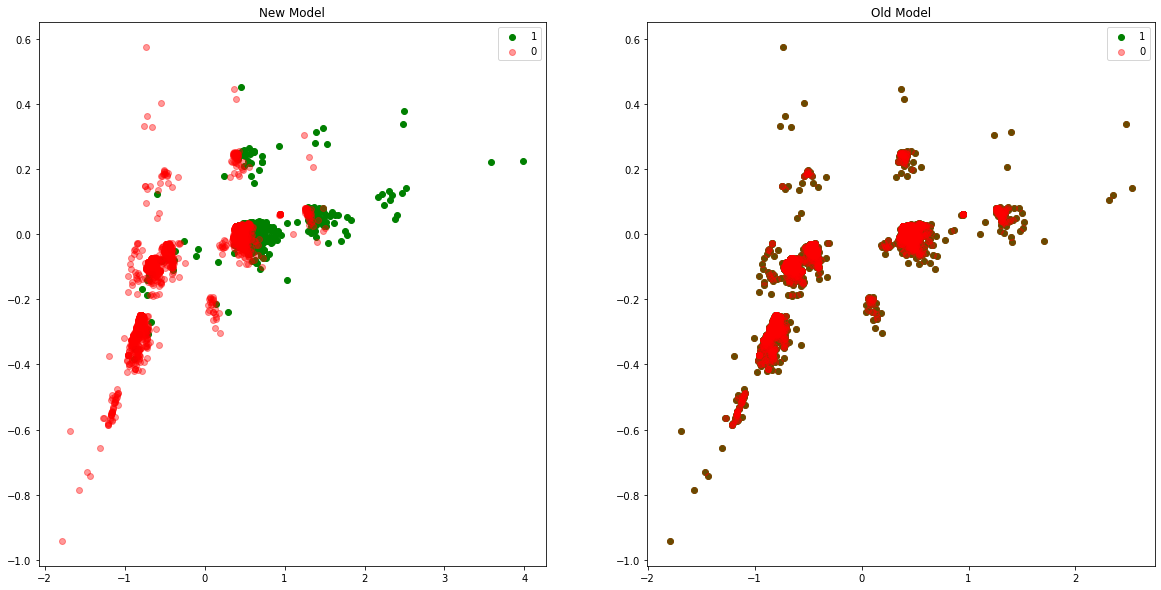

In [137]:
fig, axes = plt.subplots(figsize=(20,10), ncols=2)
axes[0].scatter(new_pred_1['x'], new_pred_1['y'], color='green', label='1')
axes[0].scatter(new_pred_0['x'], new_pred_0['y'], color='red', label='0', alpha=.4)
axes[0].set_title('New Model')

axes[1].scatter(old_pred_0['x'], old_pred_0['y'], color='green', label='1')
axes[1].scatter(old_pred_0['x'], old_pred_0['y'], color='red', label='0', alpha=.4)
axes[1].set_title('Old Model')

axes[0].legend()
axes[1].legend()
plt.show()